In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv', index_col = 0)

Data Analysis

In [2]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

EDA 

good    700
bad     300
Name: Risk, dtype: int64


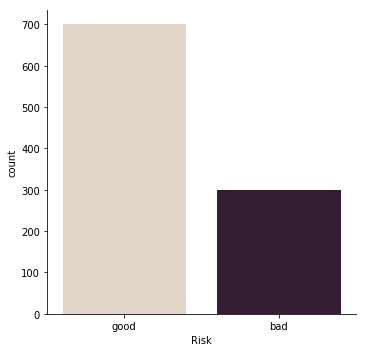

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data['Risk'].value_counts())
sns.catplot(x="Risk", kind="count", palette="ch:.25", data=data);


In [7]:
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.offline as py 
py.init_notebook_mode(connected=True) 


data_good = data.loc[data["Risk"] == 'good']['Age'].values.tolist()
data_bad = data.loc[data["Risk"] == 'bad']['Age'].values.tolist()
data_age = data['Age'].values.tolist()

#First plot
first = go.Histogram(
    x=data_good,
    histnorm='probability',
    name="Good"
)
#Second plot
second = go.Histogram(
    x=data_bad,
    histnorm='probability',
    name="Bad"
)
#Third plot
third = go.Histogram(
    x=data_age,
    histnorm='probability',
    name="Overall Age"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(first, 1, 1)
fig.append_trace(second, 1, 2)
fig.append_trace(third, 2, 1)

fig['layout'].update(showlegend=True, title='Age', bargap=0.05)
py.iplot(fig, filename='plt Age vs Risk')

/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [8]:
data_good = data.loc[data["Risk"] == 'good']['Job'].values.tolist()
data_bad = data.loc[data["Risk"] == 'bad']['Job'].values.tolist()
data_age = data['Job'].values.tolist()

#first plot
first = go.Histogram(
    x=data_good,
    histnorm='probability',
    name="Good"
)
#Second plot
second = go.Histogram(
    x=data_bad,
    histnorm='probability',
    name="Bad"
)
#Third plot
third = go.Histogram(
    x=data_age,
    histnorm='probability',
    name="Overall Job"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(first, 1, 1)
fig.append_trace(second, 1, 2)
fig.append_trace(third, 2, 1)

fig['layout'].update(showlegend=True, title='Job', bargap=0.05)
py.iplot(fig, filename='plt Job vs Risk')

In [9]:

first = go.Bar(
    x = data[data["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = data[data["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)


second = go.Bar(
    x = data[data["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = data[data["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

plot = [first, second]

layout = go.Layout(
    title='Housing vs Risk Analysis'
)


fig = go.Figure(data=plot, layout=layout)

py.iplot(fig, filename='plt housing vs Risk')

In [10]:

first = go.Bar(
    x = data[data["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = data[data["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)


second = go.Bar(
    x = data[data["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = data[data["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

plot = [first, second]

layout = go.Layout(
    title='Sex vs Risk Analysis'
)


fig = go.Figure(data=plot, layout=layout)

py.iplot(fig, filename='plt Sex vs Risk')

In [11]:

first = go.Bar(
    x = data[data["Risk"]== 'good']["Saving accounts"].value_counts().index.values,
    y = data[data["Risk"]== 'good']["Saving accounts"].value_counts().values,
    name='Good credit'
)


second = go.Bar(
    x = data[data["Risk"]== 'bad']["Saving accounts"].value_counts().index.values,
    y = data[data["Risk"]== 'bad']["Saving accounts"].value_counts().values,
    name="Bad Credit"
)

plot = [first, second]

layout = go.Layout(
    title='Saving accounts vs Risk Analysis'
)


fig = go.Figure(data=plot, layout=layout)

py.iplot(fig, filename='plt Saving accounts vs Risk')

In [12]:
first = go.Bar(
    x = data[data["Risk"]== 'good']["Purpose"].value_counts().index.values,
    y = data[data["Risk"]== 'good']["Purpose"].value_counts().values,
    name='Good credit'
)


second = go.Bar(
    x = data[data["Risk"]== 'bad']["Purpose"].value_counts().index.values,
    y = data[data["Risk"]== 'bad']["Purpose"].value_counts().values,
    name="Bad Credit"
)

plot = [first, second]

layout = go.Layout(
    title='Purpose vs Risk Analysis'
)


fig = go.Figure(data=plot, layout=layout)

py.iplot(fig, filename='plt Purpose vs Risk')

In [13]:

group = (10, 22, 30, 50, 120)

cats = ['student', 'young', 'adult', 'old']
data["Age_Group"] = pd.cut(data.Age, group, labels=cats)
data['Age_Group'].head(10)

0        old
1    student
2      adult
3      adult
4        old
5      adult
6        old
7      adult
8        old
9      young
Name: Age_Group, dtype: category
Categories (4, object): [student < young < adult < old]

In [14]:
first = go.Bar(
    x = data[data["Risk"]== 'good']["Age_Group"].value_counts().index.values,
    y = data[data["Risk"]== 'good']["Age_Group"].value_counts().values,
    name='Good credit'
)


second = go.Bar(
    x = data[data["Risk"]== 'bad']["Age_Group"].value_counts().index.values,
    y = data[data["Risk"]== 'bad']["Age_Group"].value_counts().values,
    name="Bad Credit"
)

plot = [first, second]

layout = go.Layout(
    title='Age_Group vs Risk Analysis'
)


fig = go.Figure(data=plot, layout=layout)

py.iplot(fig, filename='plt Age_Group vs Risk')

Feature Engineering


In [15]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [16]:
data = data.drop(['Age'], axis = 1)

In [17]:
data['Saving accounts'] = data['Saving accounts'].fillna('no_account')
data['Checking account'] = data['Checking account'].fillna('no_account')
data.head()

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,male,2,own,no_account,little,1169,6,radio/TV,good,old
1,female,2,own,little,moderate,5951,48,radio/TV,bad,student
2,male,1,own,little,no_account,2096,12,education,good,adult
3,male,2,free,little,little,7882,42,furniture/equipment,good,adult
4,male,2,free,little,little,4870,24,car,bad,old


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
Age_Group           1000 non-null category
dtypes: category(1), int64(3), object(6)
memory usage: 119.3+ KB


In [19]:
data = pd.get_dummies(data=data, columns=['Sex', 'Saving accounts','Checking account','Purpose', 'Age_Group', 'Housing' ])


In [20]:
y = data['Risk']

In [21]:
X = data.drop(['Risk'], axis = 1)

In [22]:
X.head()

,Job,Credit amount,Duration,Sex_female,Sex_male,Saving accounts_little,Saving accounts_moderate,Saving accounts_no_account,Saving accounts_quite rich,Saving accounts_rich,...,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_Group_student,Age_Group_young,Age_Group_adult,Age_Group_old,Housing_free,Housing_own,Housing_rent
0,2,1169,6,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
1,2,5951,48,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,1,2096,12,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2,7882,42,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2,4870,24,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
data = scaler.transform(X)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = pd.Series(le.transform(y))
y.head()

0    1
1    0
2    1
3    1
4    0
dtype: int64

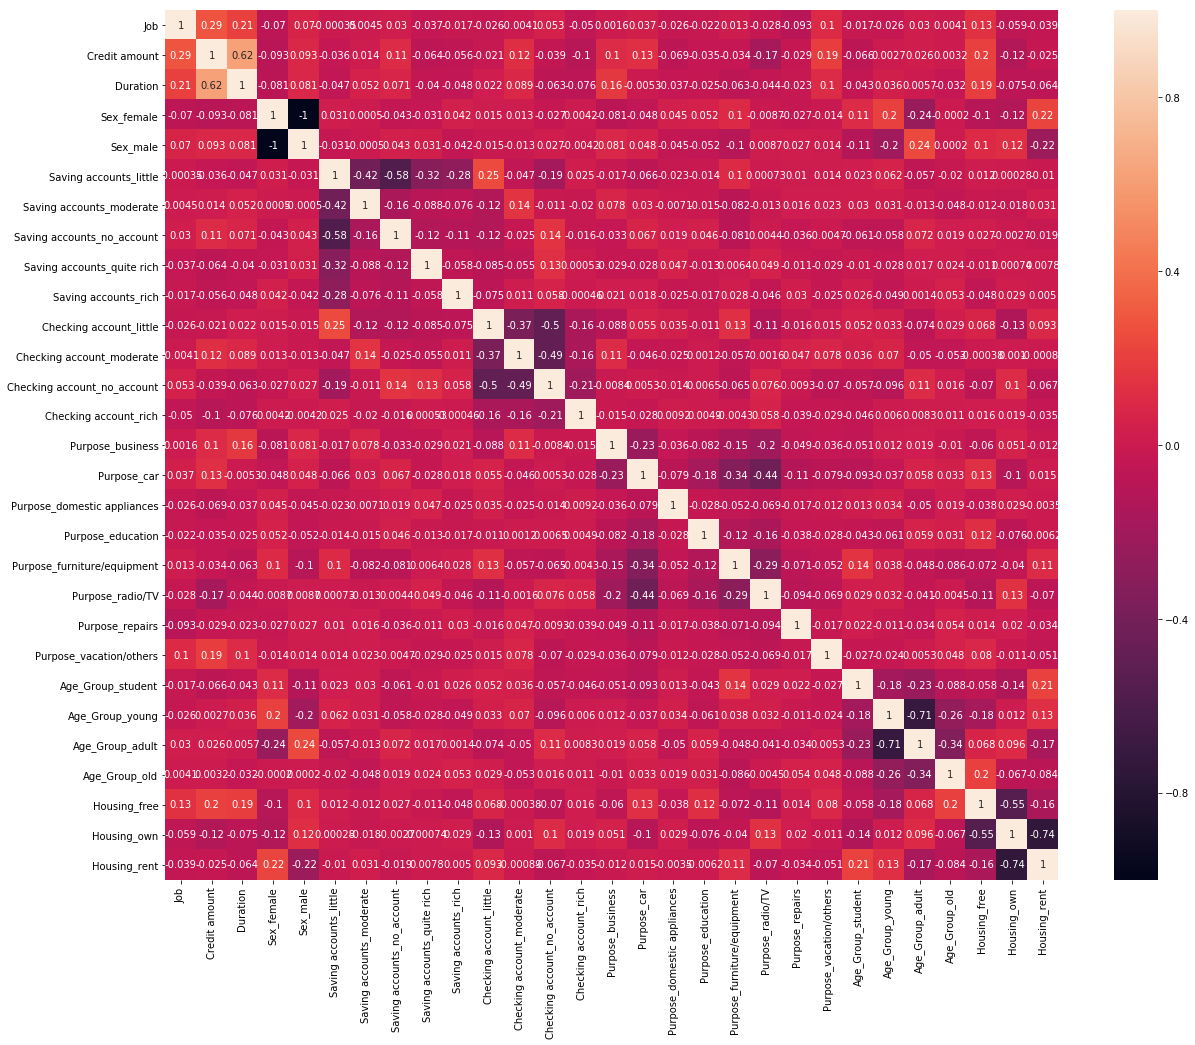

In [25]:
plt.figure(figsize=(20,16))
sns.heatmap(X.astype(float).corr(), annot=True)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [27]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [28]:
models = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearDiscriminantAnalysis(),GaussianNB(), SVC(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    print(model,'Accuracy = ',accuracy_score(y_test, model.predict(x_test)))
    print('classification_report = ',classification_report(y_test, model.predict(x_test)))
    print('\n')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Accuracy =  0.74
classification_report =                precision    recall  f1-score   support

           0       0.56      0.53      0.54        59
           1       0.81      0.83      0.82       141

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_ite

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) Accuracy =  0.695
classification_report =                precision    recall  f1-score   support

           0       0.25      0.02      0.03        59
           1       0.70      0.98      0.82       141

    accuracy                           0.69       200
   macro avg       0.48      0.50      0.43       200
weighted avg       0.57      0.69      0.59       200



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, 

From above models we can see, We are getting highest accuracy and better values of precision and recall for XGBClassifier

In [29]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
print('Accuracy = ',accuracy_score(y_test, xgb_model.predict(x_test)))
print('classification_report = ',classification_report(y_test, xgb_model.predict(x_test)))

Accuracy =  0.8
classification_report =                precision    recall  f1-score   support

           0       0.79      0.44      0.57        59
           1       0.80      0.95      0.87       141

    accuracy                           0.80       200
   macro avg       0.80      0.70      0.72       200
weighted avg       0.80      0.80      0.78       200



In [30]:
param_grid = {"max_depth": [3,5, 7, 10],
              "n_estimators":[10,50,250, 500,1000],
              "max_features": [4,7,15,20],
              "learning_rate": [0.1,0.05,0.001]}
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, scoring='recall', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  5.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05, 0.001],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': [4, 7, 15, 

In [31]:
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 4, 'n_estimators': 50}


In [32]:
print('Accuracy_Score',accuracy_score(y_test,grid_search.predict(x_test)))
print("\n")
print('Classification_Report',classification_report(y_test, grid_search.predict(x_test)))

Accuracy_Score 0.76


Classification_Report               precision    recall  f1-score   support

           0       0.70      0.32      0.44        59
           1       0.77      0.94      0.85       141

    accuracy                           0.76       200
   macro avg       0.74      0.63      0.64       200
weighted avg       0.75      0.76      0.73       200

